# Titanic data preprocessing
## Kamil Misiak

W tym sprawozdaniu porusze temat czyszczenie i przygotowania danych do analizy.

## Agenda
1. Załadowanie zbioru danych i wstępne statystyki
2. Określenie typów danych
3. Czyszczenie pustych wartości
4. Usuwanie zbędnych atrybutów
5. Pomiar dokładności klasfyikacji na przygotowanym zbiorze danych
6. Zapis zbioru i podsumowanie

## Krok 1: Załadowanie zbioru danych i wstępne statystyki

In [1]:
# Przygotowanie danych
import pandas as pd
import numpy as np

# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Klasyfikacja
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Załadowanie zbioru
data = pd.read_table('./data/TitanicMess.tsv', sep='\t', header=0)

#### Następnie przyjrzmy się kolumną które występują w zbiorze danych

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'ship'],
      dtype='object')

#### Następnie wyświelimy 5 pierwszych rekordów

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38      1   
2                             Heikkinen, Miss. Laina  female  26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35      1   
4                           Allen, Mr. William Henry    male  35      0   

   Parch            Ticket     Fare Cabin Embarked     ship  
0      0         A/5 21171     7,25   NaN        S  Titanic  
1      0          PC 17599  71,2833   C85        C  Titanic  
2      0  STON/O2. 3101282    7,925   NaN        S  Titanic  
3      0            113803     53,1  C123        S  Titanic  
4      0            373450     8,05   NaN        S  Titanic

#### Oraz końcowe 5 rekordów

In [4]:
data.tail()

PassengerId  Survived  Pclass                                      Name  \
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   
891         1000         1       1               Mr. Frederick Maxfield Hoyt   

        Sex  Age  SibSp  Parch      Ticket   Fare Cabin Embarked     ship  
887  female   19      0      0      112053     30   B42        S  Titanic  
888  female  NaN      1      2  W./C. 6607  23,45   NaN        S  Titanic  
889    male   26      0      0      111369     30  C148        C  Titanic  
890    male   32      0      0      370376   7,75   NaN        Q  Titanic  
891    male   38      1      0       19943     90   C93        S  Titanic

#### Podgląd zbioru

In [5]:
print(data.shape)
print('\n')
print(data.dtypes)

(892, 13)


PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
ship           object
dtype: object


#### Liczba atrybutów oraz typ danych

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    int64 
 1   Survived     892 non-null    int64 
 2   Pclass       892 non-null    int64 
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          719 non-null    object
 6   SibSp        892 non-null    int64 
 7   Parch        892 non-null    int64 
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        207 non-null    object
 11  Embarked     890 non-null    object
 12  ship         892 non-null    object
dtypes: int64(5), object(8)
memory usage: 90.7+ KB


Jak widać w zbiorze mamy 892 rekrody, które zaiwerają 13 atrybutów
#### Następnie wyświetlimy podstawowe statystki opisowe atrybutów

In [7]:
data.describe()

PassengerId    Survived      Pclass       SibSp       Parch
count   892.000000  892.000000  892.000000  892.000000  892.000000
mean    445.762332    0.386771    2.307175    0.525785    0.371076
std     257.990085    0.487284    0.836750    1.102190    0.768468
min       1.000000    0.000000    1.000000    0.000000    0.000000
25%     223.750000    0.000000    2.000000    0.000000    0.000000
50%     444.500000    0.000000    3.000000    0.000000    0.000000
75%     668.250000    1.000000    3.000000    1.000000    0.000000
max    1000.000000    1.000000    3.000000    8.000000    5.000000

## Krok 2: Określenie typów danych

Niektóre kolumny posiadają źle określony typ danych, co może skutkować błędami w dalszym przygotowaniu zbioru do anlalizy. Nasze przygotowanie ropoczniemy od wskazania prawidłowego typu danych w kolumnach.

In [8]:
data.Survived = data.Survived.astype('bool')
data.Pclass = data.Pclass.astype('category')
data.Sex = data.Sex.astype('category')
data.Embarked = data.Embarked.astype('category')

Atrybut "Age" zawiera liczby float odzielone znakiem ',', co jest błędnie rozpoznawana przez interpreter. Aby typ kolumny został prawidłowo przekonwerotowany do typu float, musimy zaminieć znak przecnika, na kropkę.

In [9]:
data.Age = data.Age.str.replace(',', '.').astype('float64')

W atrybucie Fare dodatkowo, jeden z atybutów zawiera znak alphanumeryczny. Musimy przefiltrować wartośći kolumny, aby zawierała tylko cyfry.

In [10]:
data.Fare = data.Fare.str.extract('(\d+)', expand=False)
data.Fare = data.Fare.str.replace(',', '.').astype('float64')

Po przekstałecniu typów danych tak prezentują się kolumny oraz 10 pierwszych wierszy zbioru.

In [11]:
print(data.dtypes)
data.head(10)

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
ship             object
dtype: object


PassengerId  Survived Pclass  \
0            1     False      3   
1            2      True      1   
2            3      True      3   
3            4      True      1   
4            5     False      3   
5            6     False      3   
6            7     False      1   
7            8     False      3   
8            9      True      3   
9           10      True      2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket  Fare Cabin Embarked     ship  
0      0         A/5 21171   7.0   NaN        S  Titanic  
1      0          PC 17599  71.0   C85        C  Titanic  
2      0  STON/O2. 3101282   7.0   NaN        S  Titanic  
3      0            113803  53.0  C123        S  Titanic  
4      0            373450   8.0   NaN        S  Titanic  
5      0            330877   8.0   NaN        Q  Titanic  
6      0             17463  51.0   E46        S  Titanic  
7      1            349909  21.0   NaN        S  Titanic  
8      2            347742  11.0   NaN        S  Titanic  
9      0            237736  30.0   NaN        C  Titanic

## Krok 3: Czyszczenie pustych wartości

#### Sprawdzamy ile atrybutów ma wartośći puste

In [12]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
ship             0
dtype: int64


#### Heatmapa brakujących wartości

<AxesSubplot:>

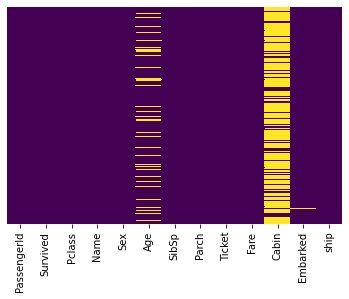

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Jak widać najwięcej pustych wartości zawierają kolumny "Age" oraz "Cabin". Ilość brakujących wartości atrybutu "Age" to około "20%", w dalszej cześci spróbujemy uzupełnić brakujące wartośći. Natomiast braki atrybutu "Cabin" są na tyle duże, że nie jesteśmy w stanie przewidzieć wartości brakujących atrybutów.

#### Uzupełnimy brakujące wartośći atrybutu "Age"

Przyjrzymy się rozkładowi atrybutu "Age" ze względu na klasę poróży pasażerów, jak widać jedna z wartośći przyjmuję wartość ponad 4000. Jest to dana odstająca która należy usunąć przed dalszą analizą.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

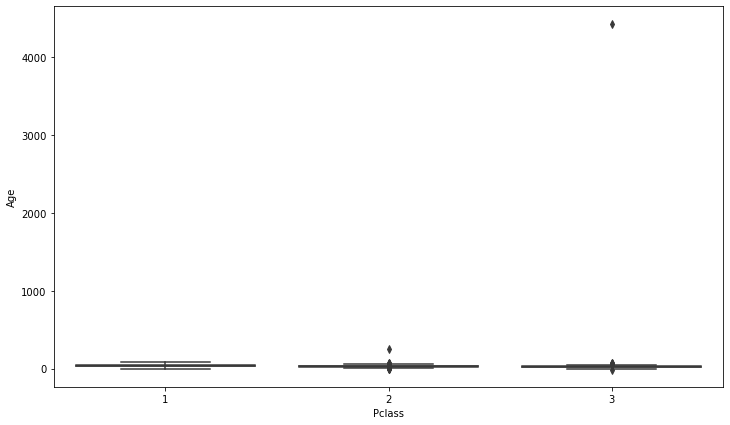

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Usuwamy odstające wartości z atrybutu wiek. Przyjmuję że wszystkie wartości powyżej 100 oraz poniżej 0 są odstające. Wartość od 0 do 100, stanowią standardową długość życia człowieka.

In [15]:
max_thresold = 100
min_thresold = 0
data[(data.Age > max_thresold) | (data.Age < min_thresold)]

PassengerId  Survived Pclass  \
223          224     False      3   
507          508      True      1   
522          523     False      3   
666          667     False      2   

                                              Name   Sex     Age  SibSp  \
223                           Nenkoff, Mr. Christo   mal  4435.0      0   
507  Bradley, Mr. George ("George Arthur Brayton")  male    -3.0      0   
522                             Lahoud, Mr. Sarkis  male   -12.0      0   
666                    Butler, Mr. Reginald Fenton  male   250.0      0   

     Parch  Ticket  Fare Cabin Embarked     ship  
223      0  349234   7.0   NaN        S  Titanic  
507      0  111427  26.0   NaN        S  Titanic  
522      0    2624   7.0   NaN        C  Titanic  
666      0  234686  13.0   NaN        S  Titanic

In [16]:
data.loc[(data.Age > max_thresold) | (data.Age < min_thresold)] = np.nan

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

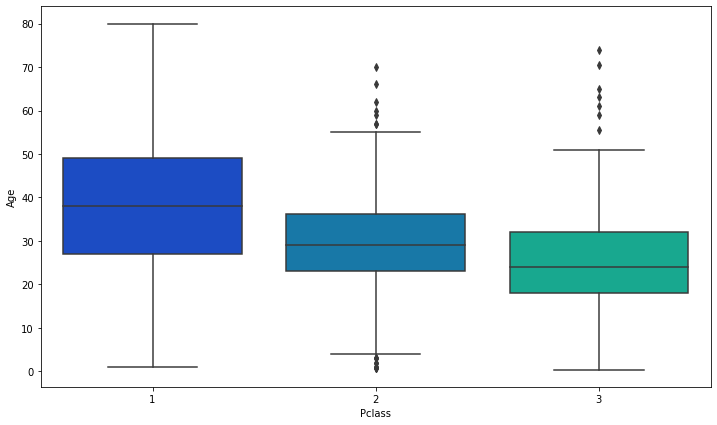

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Następnie napiszemy funkcję która będzie uzupełniać brakujące wartości atrybutu wiek, na podstawie percentyla wartości danej klasy podróży.

In [18]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return data[data.Pclass==1].Age.quantile()
        elif Pclass==2:
            return data[data.Pclass==2].Age.quantile()
        elif Pclass==3:
            return data[data.Pclass==3].Age.quantile()
        else:
            return Age
    else: 
        return Age

Wywołanie funkcji

In [19]:
data.Age = data[['Age', 'Pclass']].apply(fill_age, axis=1)

Ponownie heatmap. Jak widać brakujące wartości atrybutu "Age" zostały usunięte.

<AxesSubplot:>

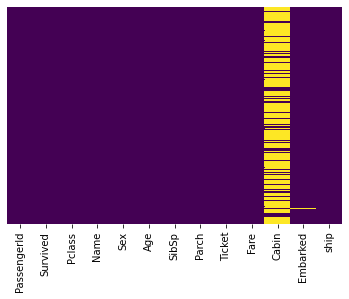

In [20]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Krok 5: Pomiar dokładności klasfyikacji na przygotowanym zbiorze danych

In [21]:
X_data = data.drop("Survived", axis=1)
X_data = data.drop("Name", axis=1)
Y_data = data.Survived

decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, X_data, Y_data, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').